# Current Topics and Projects
## 2. Video statistics as indikator for polarization

In [6]:
'''
This file sould be runned the 8th
This file generates all plots used in the paper plus plots we didnt use, besides the graph plots
'''

import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import matplotlib.ticker as ticker
from matplotlib.colors import LinearSegmentedColormap
import pandas as pd
from collections import Counter
import seaborn as sns





In [7]:
df_vid = pd.read_csv("data/videos.csv")
df_com = pd.read_csv("data/comments_final.csv")
df_com.describe(include='all')

,commentID,text,publishedAt,authorID,likeCount,totalReplyCount,parentID,videoID,channelId,username,...,user_replies,cluster_values,cluster,stable_tox,stable_sent,personal_attack,personal_attack_name,personal_attack_gender,personal_attack_party,in_cluster
count,134883,134883,134883,134883,134883.000000,134883.000000,134883,134883,134883,134840,...,134883.000000,134883,134883.000000,134883.000000,134883.000000,134883.000000,134883,134883,134883,134883.000000
unique,134883,134883,132406,42340,NaN,NaN,13485,153,3,40175,...,NaN,309,NaN,NaN,NaN,NaN,1183,75,324,NaN
top,UgzNbjRq-bmbAkT8AKd4AaABAg,Die Kraftwerke weiterlaufen zu lassen ist nich...,2022-09-15T17:10:22Z,UC-SPRRf3pjqEjGoULaqNURw,NaN,NaN,0,c0G7qF44wLc,UCcoQ3WG2J_Xjwwyt-sJqh-w,Alfons Choubek,...,NaN,[],NaN,NaN,NaN,NaN,[],[],[],NaN
freq,1,1,4,741,NaN,NaN,112563,4772,113540,741,...,NaN,67577,NaN,NaN,NaN,NaN,121466,121466,121466,NaN
mean,NaN,NaN,NaN,NaN,8.367118,0.514342,NaN,NaN,NaN,NaN,...,5.736979,NaN,0.208591,0.108123,0.093941,0.099471,NaN,NaN,NaN,0.498995
std,NaN,NaN,NaN,NaN,62.251646,3.516488,NaN,NaN,NaN,NaN,...,570.001232,NaN,0.212409,0.310537,0.291747,0.299295,NaN,NaN,NaN,0.500001
min,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,...,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,0.000000
25%,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,...,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,0.000000
50%,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,...,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,0.000000
75%,NaN,NaN,NaN,NaN,2.000000,0.000000,NaN,NaN,NaN,NaN,...,0.000000,NaN,0.412581,0.000000,0.000000,0.000000,NaN,NaN,NaN,1.000000


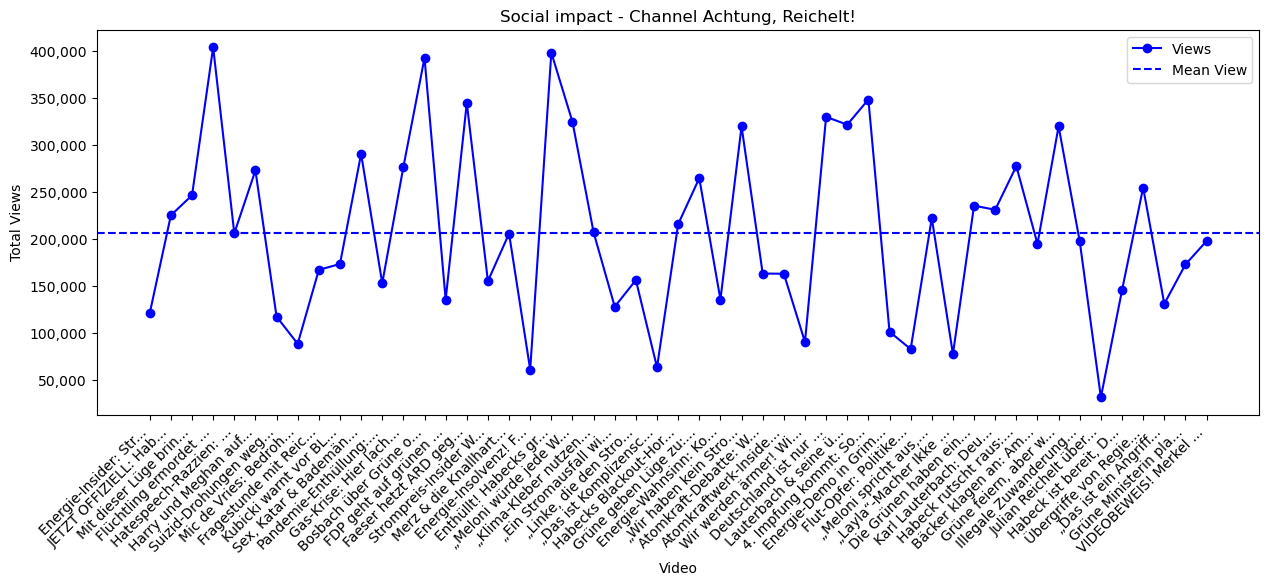

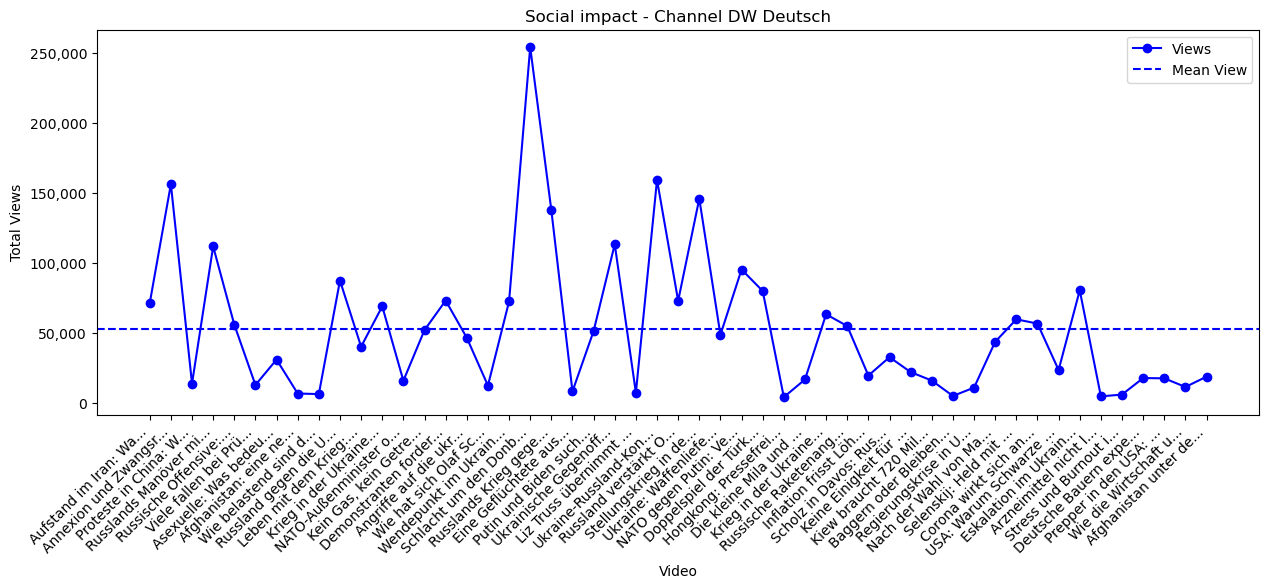

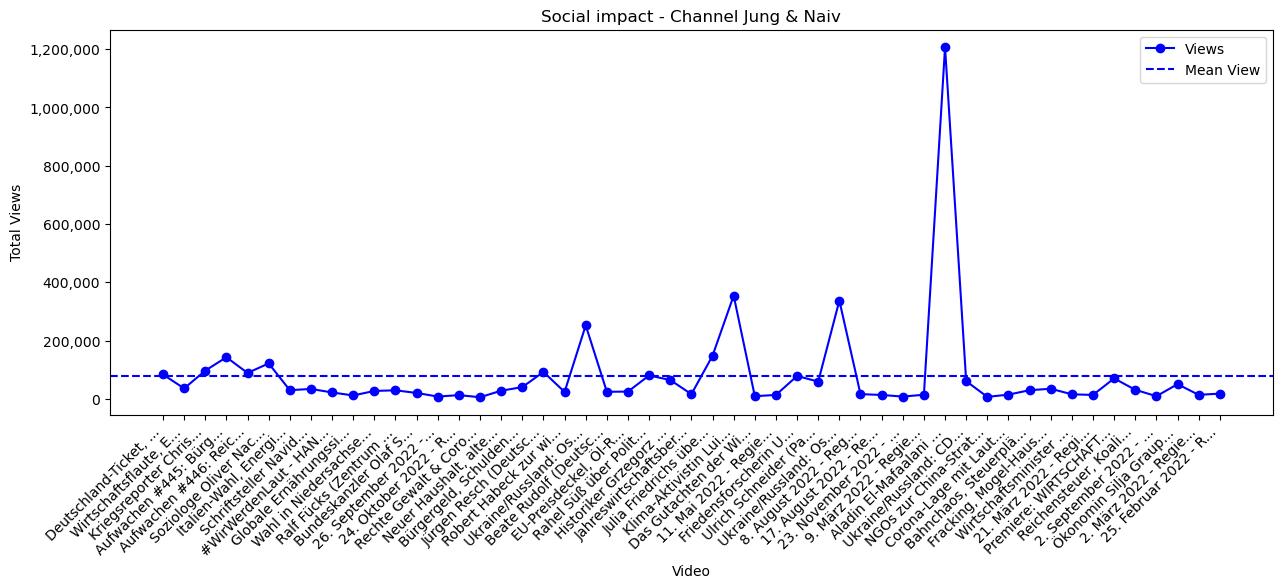

In [8]:
'''
Plot views of videos
'''
# Group the DataFrame by 'channelId'
grouped = df_vid.groupby('channelName')

# Iterate over the groups and create separate plots for each channel
for channel, data in grouped:
    
    # Calculate the mean of each ratio for the entire DataFrame
    mean_view = data['viewCount'].mean()
    
    # Create a new plot for each channel
    plt.figure(figsize=(15, 5))

    data['short_title'] = data['title'].str[:20] + "..."

    # Plot the data for the current channel
    plt.plot(data['videovideoID'], data['viewCount'], marker='o', label='Views', color='blue')
    #plt.plot(data['title_keywords'], data['likeCount'], marker='o', label='Likes', color='orange')
    #plt.plot(data['title_keywords'], data['commentCount'], marker='o', label='Comments', color='red')

    # Plot the mean values
    plt.axhline(y=mean_view, color='blue', linestyle='--', label='Mean View')
    #plt.axhline(y=mean_comment_like, color='orange', linestyle='--', label='Mean Comment/Like')
    #plt.axhline(y=mean_comment_view, color='red', linestyle='--', label='Mean Comment/View')

    plt.title(f'Social impact - Channel {channel}')
    plt.xlabel('Video')
    plt.ylabel('Total Views')
    #plt.xticks()
    plt.legend()

    tick_positions = range(len(data))
    tick_labels = data['short_title']

    plt.xticks(tick_positions, tick_labels, rotation=45, ha="right")
    
    # Format the y-axis ticks as normal numbers
    plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f"{int(x):,}"))

    # Save the plot as an image (optional)
    plt.savefig(f'plots/video_views{channel}.png', dpi=300)

    plt.show()

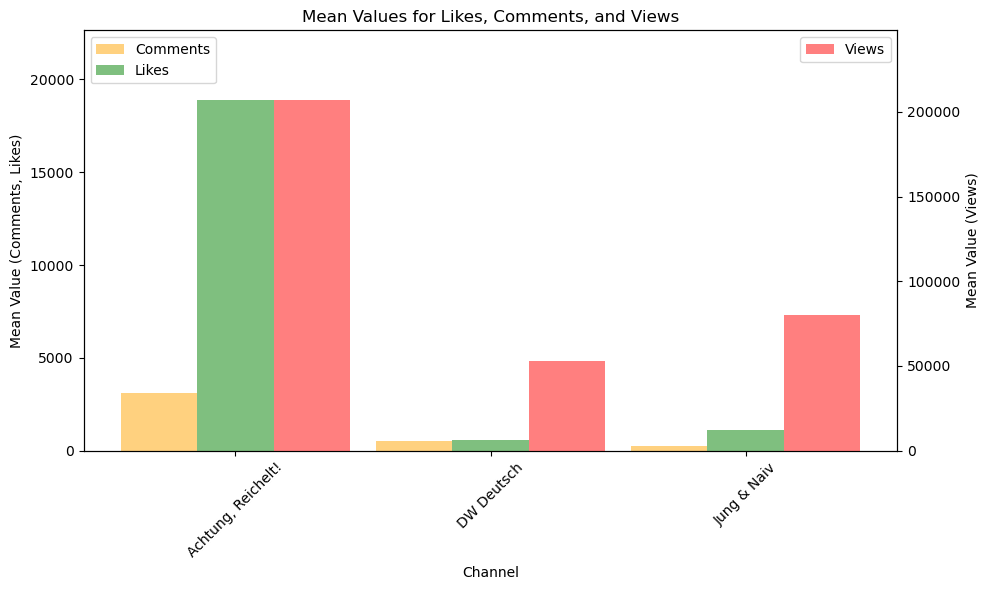

In [9]:
'''
Plot mean views, comments and likes per Channel
'''

# Group the DataFrame by 'channelName'
grouped = df_vid.groupby('channelName')

# Calculate the mean of each metric for each channel
mean_values = grouped[['viewCount', 'likeCount', 'commentCount']].mean().round(2)

# Create a pivot table with mean values
mean_pivot = mean_values.pivot_table(index=None, columns='channelName', values=['viewCount', 'likeCount', 'commentCount'])


# Extract the data
channels = list(mean_pivot.keys())
comments = [mean_pivot[channel]['commentCount'] for channel in channels]
likes = [mean_pivot[channel]['likeCount'] for channel in channels]
views = [mean_pivot[channel]['viewCount'] for channel in channels]

# Set up the plot
fig, ax1 = plt.subplots(figsize=(10, 6))
bar_width = 0.3
index = np.arange(len(channels))

# Define colors for comments, likes, and views
comment_color = 'orange'
like_color = 'green'
view_color = 'red'

# Plot the bars for comments and likes
ax1.bar(index, comments, bar_width, color=comment_color, label='Comments', alpha=0.5)
ax1.bar(index + bar_width, likes, bar_width, color=like_color, label='Likes', alpha=0.5)

# Set the y-axis scale and label for comments and likes
ax1.set_yscale('linear')
ax1.set_ylabel('Mean Value (Comments, Likes)')
ax1.set_ylim(0, max(max(comments), max(likes)) * 1.2)

# Create a second y-axis for views
ax2 = ax1.twinx()
ax2.bar(index + 2 * bar_width, views, bar_width, color=view_color, label='Views', alpha=0.5)

# Set the y-axis scale and label for views
ax2.set_yscale('linear')
ax2.set_ylabel('Mean Value (Views)')
ax2.set_ylim(0, max(views) * 1.2)

# Set the labels and title
ax1.set_xlabel('Channel')
ax1.set_title('Mean Values for Likes, Comments, and Views')

# Set the x-axis tick positions and labels
ax1.set_xticks(index + bar_width)
ax1.set_xticklabels(channels, rotation=45)

# Add a legend
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Display the plot
plt.tight_layout()
plt.savefig('plots/channel_stats.png', bbox_inches='tight')
plt.show()

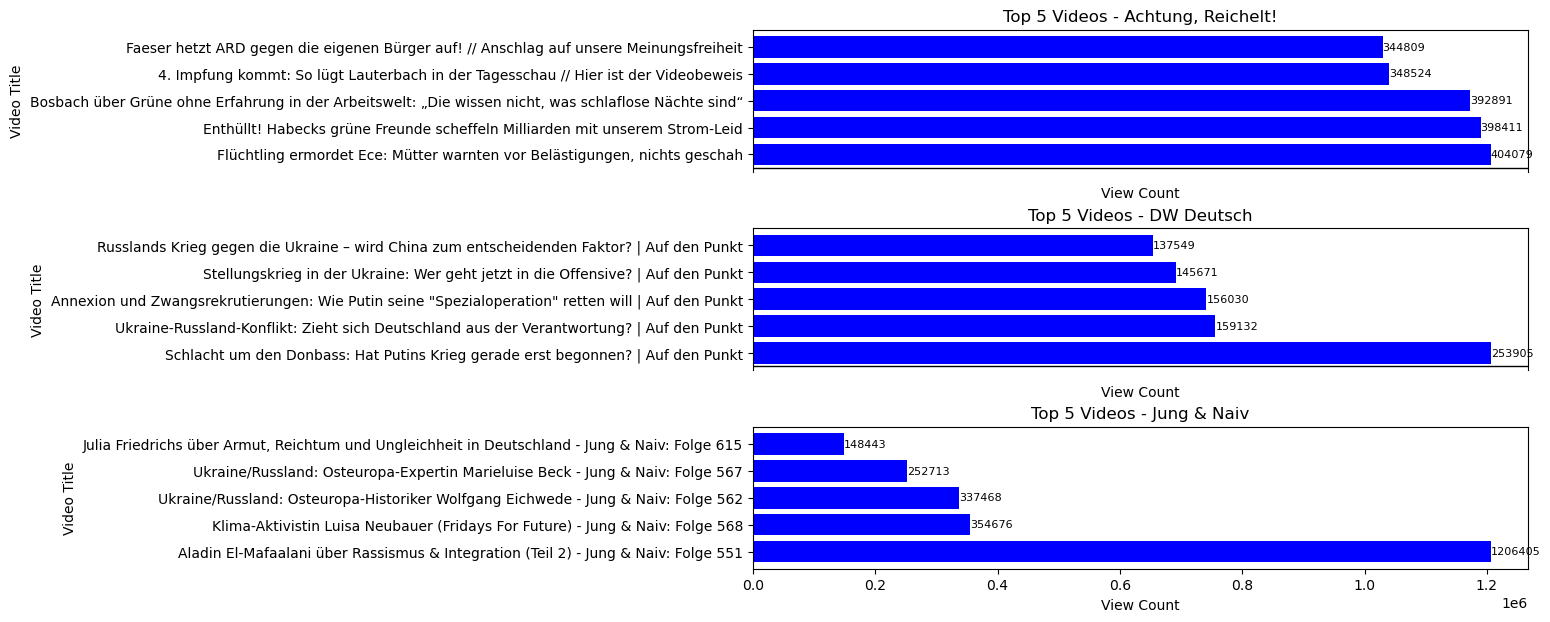

In [10]:
'''
Plot five videos with highest views and theier title
'''
# Sort the DataFrame by 'viewCount' in descending order
df_vid_sorted = df_vid.sort_values(by='viewCount', ascending=False)

# Group the DataFrame by 'channelName'
grouped = df_vid_sorted.groupby('channelName')

# Create a figure for the PowerPoint presentation
fig = plt.figure(figsize=(10, 7))

# Iterate over the groups and plot the top 5 videos for each channel
for i, (channel, data) in enumerate(grouped):
    # Select the top 5 videos for the current channel
    top_5_videos = data.head(5)
    
    # Create a subplot for each channel
    ax = fig.add_subplot(len(grouped), 1, i+1)
    
    # Plot the data for the current channel
    ax.barh(top_5_videos['title'], top_5_videos['viewCount'], color='blue')
    
    # Set the title and labels for the current subplot
    ax.set_title(f'Top 5 Videos - {channel}')
    ax.set_xlabel('View Count')
    ax.set_ylabel('Video Title')
    
    # Optionally, annotate the bars with view counts
    for j, v in enumerate(top_5_videos['viewCount']):
        ax.text(v, j, str(v), ha='left', va='center', fontsize=8)
    
    # Adjust the spacing between subplots
    if i < len(grouped) - 1:
        ax.spines['bottom'].set_visible(False)
        ax.tick_params(axis='x', bottom=False)
        ax.xaxis.set_ticklabels([])
        ax.axhline(y=-0.5, color='black', linewidth=1)
    
    plt.subplots_adjust(hspace=0.4)

# Save the plot as an image (optional)
plt.savefig('plots/topp_5_videos.png', dpi=300)

# Show the plot (optional)
plt.show()

Toxicity Score

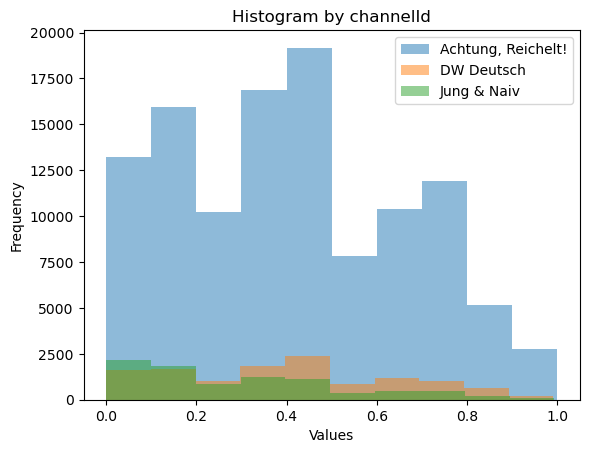

In [11]:
'''
Plot histogramm of toxicity total values
'''

grouped = df_com.groupby('channelName')

for channel, data in grouped:
    plt.hist(data['toxicity'], label=channel, alpha=0.5)

# Set labels and title for the histogram
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histogram by channelId')

# Display a legend
plt.legend()

# Show the histogram
plt.show()

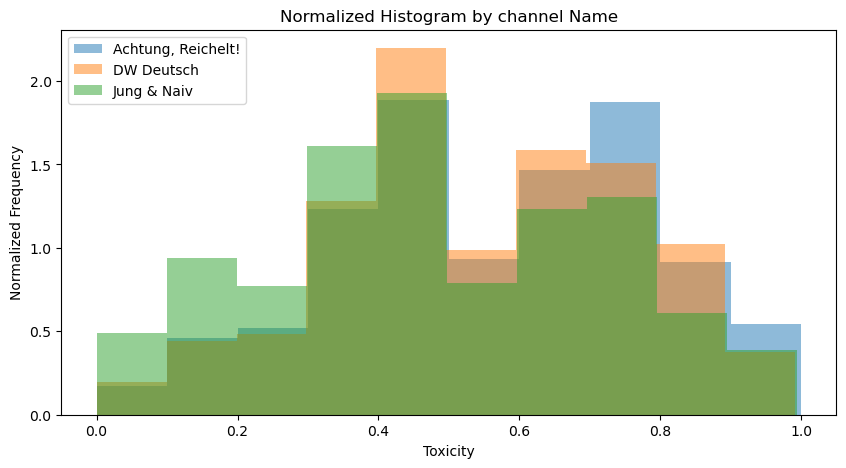

In [12]:
'''
Plot histogramm of toxicity normalized values
'''

grouped = df_com.groupby('channelName')

# Create a figure and axis for the histogram plot
fig, ax = plt.subplots(figsize=(10, 5))

# Iterate over the grouped data and plot normalized histograms for each channel
for channel, data in grouped:
    # Calculate the total number of values for the current channel
    total_values = np.sum(data['toxicity'])
    # Calculate the normalized frequencies
    normalized_counts = data['toxicity'] / total_values
    # Plot the normalized histogram
    ax.hist(data['toxicity'], weights=normalized_counts, label=channel, alpha=0.5, density=True)

# Set labels and title for the histogram
ax.set_xlabel('Toxicity')
ax.set_ylabel('Normalized Frequency')
ax.set_title('Normalized Histogram by channel Name')

# Display a legend
ax.legend()


# Save the plot to a PNG file
plt.savefig('plots/tox_histogram1.png')

# Show the histogram
plt.show()

In [13]:
df1 = df_com[df_com["channelName"] == "Jung & Naiv"]
df2 = df_com[df_com["channelName"] == "DW Deutsch"]
print(len(df1))
len(df2)

8861


12482

Achtung, Reichelt!
DW Deutsch
Jung & Naiv


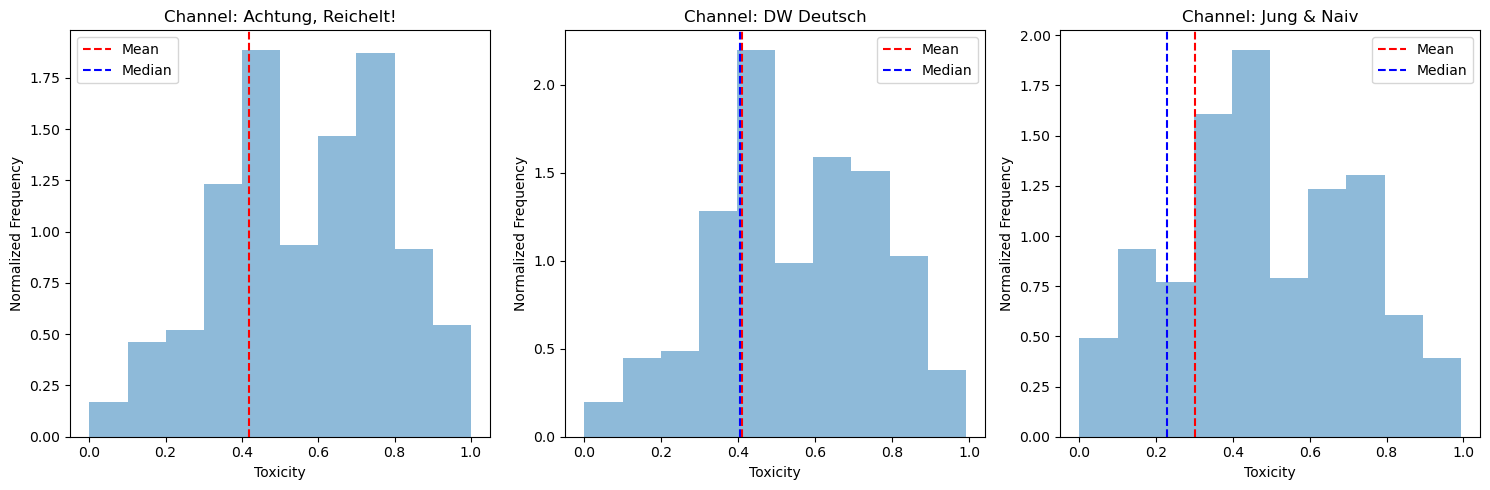

In [14]:
'''
Plot histogramm of toxicity normalized values each
'''

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Flatten the axes array to iterate over subplots
axes = axes.flatten()

# Iterate over the grouped data and plot histograms in separate subplots
for i, (channel, data) in enumerate(grouped):
    print(channel)
    ax = axes[i]
    
    # Calculate the total number of values for the current channel
    total_values = np.sum(data['toxicity'])
    # Calculate the normalized frequencies
    normalized_counts = data['toxicity'] / total_values
    
    # Plot the normalized histogram in the current subplot
    ax.hist(data['toxicity'], weights=normalized_counts, alpha=0.5,density=True)
    ax.set_title(f'Channel: {channel}')
    ax.set_xlabel('Toxicity')
    ax.set_ylabel('Normalized Frequency')
    
    # Calculate mean and median values
    mean_value = np.mean(data['toxicity'])
    median_value = np.median(data['toxicity'])
    
    # Draw lines for comparison
    ax.axvline(x=mean_value, color='red', linestyle='--', label='Mean')
    ax.axvline(x=median_value, color='blue', linestyle='--', label='Median')

    # Add a legend
    ax.legend()

# Adjust the spacing between subplots
plt.tight_layout()

# Save the plot to a PNG file
plt.savefig('plots/tox_histogram2.png')

# Show the plot
plt.show()


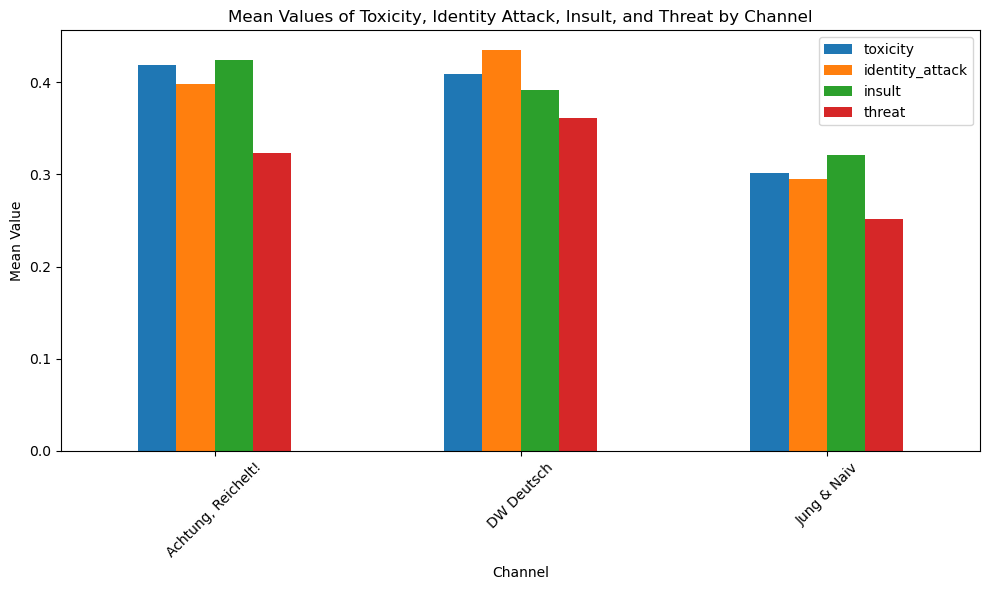

In [15]:
'''
Plot all perspective api values in mean
'''
# Group the DataFrame by channelname and calculate the mean values
channel_stats = df_com.groupby('channelName')[['toxicity', 'identity_attack', 'insult', 'threat']].mean()

# Plotting the mean values
channel_stats.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Channel')
plt.ylabel('Mean Value')
plt.title('Mean Values of Toxicity, Identity Attack, Insult, and Threat by Channel')
plt.xticks(rotation=45)
plt.legend(loc='best')

# Save the figure with adjusted settings
plt.tight_layout()  # Adjust the layout to prevent cutoff
plt.savefig('plots/api_values.png', bbox_inches='tight')
plt.show()

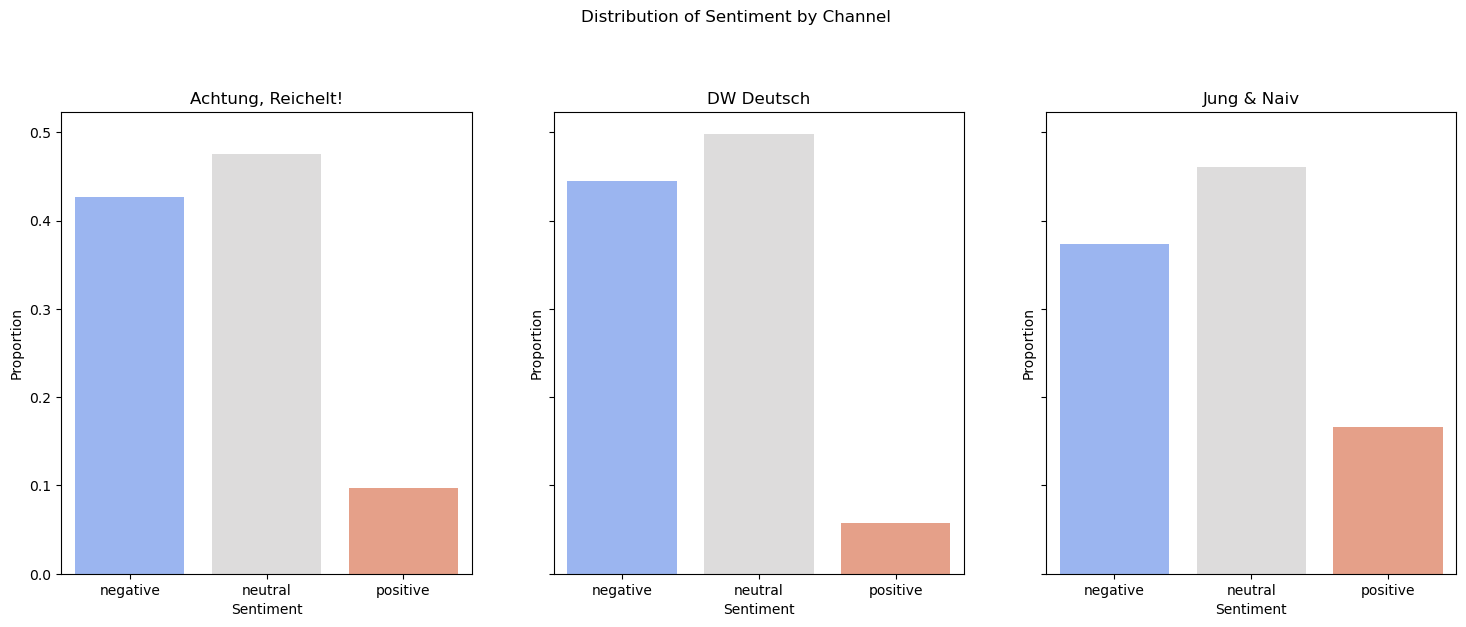

In [16]:
'''
Plot histogramm of sentiment each
'''

# Assuming your DataFrame is called df
# It should have columns: text, sentiment, channelName

# Generate a pivot table to get the counts of sentiment for each channelName
pivot_df = df_com.pivot_table(index='channelName', columns='sentiment', aggfunc='size', fill_value=0)

# Normalize the counts to get proportions instead of raw counts
normalized_df = pivot_df.div(pivot_df.sum(axis=1), axis=0)

# Get the unique channel names
channel_names = normalized_df.index

# Set up the subplots
num_channels = len(channel_names)
fig, axes = plt.subplots(1, num_channels, figsize=(6*num_channels, 6), sharey=True)

# Iterate over each channel and create a subplot
for i, channel_name in enumerate(channel_names):
    ax = axes[i]
    sns.barplot(data=normalized_df.loc[channel_name].to_frame().T, ax=ax, palette='coolwarm')
    
    # Set the title and labels for each subplot
    ax.set_title(channel_name)
    ax.set_xlabel('Sentiment')
    ax.set_ylabel('Proportion')

# Set the overall title and adjust the spacing between subplots
plt.suptitle('Distribution of Sentiment by Channel', y=1.05)
# Save the plot to a PNG file
plt.savefig('plots/sent_histogram2.png')
# Show the plot

plt.show()



In [17]:
# Calculate the correlation coefficient between 'sentiment' and 'toxicity'
correlation = df_com['prob_neg'].corr(df_com['toxicity'])

# Print the correlation coefficient
print(f"Correlation between sentiment and toxicity: {correlation}")



Correlation between sentiment and toxicity: 0.2704427550507538
